In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn import datasets
from keras.utils.np_utils import to_categorical

In [0]:
np.random.seed(0)
npoints = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X,y = datasets.make_blobs(centers= centers,n_samples = npoints,cluster_std = 0.4,random_state=123)

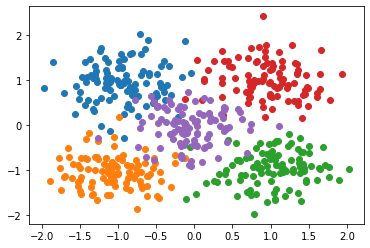

In [6]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

In [0]:
model = Sequential()
model.add(Dense(units = 5,input_shape = (2,),activation = 'softmax'))
model.compile(Adam(0.01),'categorical_crossentropy',metrics = ['accuracy'])

In [0]:
y_cat = to_categorical(y,num_classes = 5 )

In [17]:
h = model.fit(X,y_cat,batch_size = 50,epochs = 500,verbose =1)

Epoch 1/500
500/500 [==============================] - 0s 133us/step - loss: 1.8462 - accuracy: 0.2560
Epoch 2/500
500/500 [==============================] - 0s 25us/step - loss: 1.6850 - accuracy: 0.2460
Epoch 3/500
500/500 [==============================] - 0s 23us/step - loss: 1.5357 - accuracy: 0.2400
Epoch 4/500
500/500 [==============================] - 0s 22us/step - loss: 1.4006 - accuracy: 0.2380
Epoch 5/500
500/500 [==============================] - 0s 23us/step - loss: 1.2844 - accuracy: 0.2440
Epoch 6/500
500/500 [==============================] - 0s 29us/step - loss: 1.1814 - accuracy: 0.2800
Epoch 7/500
500/500 [==============================] - 0s 22us/step - loss: 1.0924 - accuracy: 0.5400
Epoch 8/500
500/500 [==============================] - 0s 22us/step - loss: 1.0141 - accuracy: 0.6540
Epoch 9/500
500/500 [==============================] - 0s 22us/step - loss: 0.9483 - accuracy: 0.7560
Epoch 10/500
500/500 [==============================] - 0s 22us/step - loss: 0.89

In [0]:
accuracy = h.history['accuracy']
loss = h.history['loss']

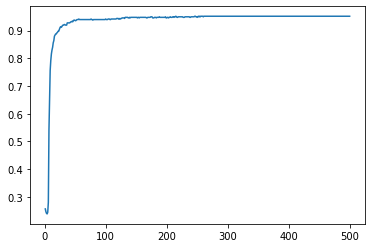

In [19]:
plt.plot(range(1,len(accuracy)+1),accuracy)

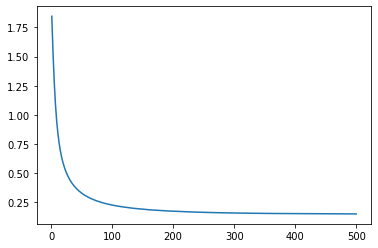

In [20]:
plt.plot(range(1,len(accuracy)+1),loss)

In [0]:
def plot_decision_boundary(X,y,model):
  xspan = np.linspace(X[:,0].min() - 0.25,X[:,0].max() + 0.25)
  yspan = np.linspace(X[:,1].min() - 0.25 , X[:,1].max() + 0.25)
  xx,yy = np.meshgrid(xspan,yspan)
  xx_,yy_  =xx.ravel(),yy.ravel()
  grid = np.c_[xx_,yy_]
  predictions = model.predict_classes(grid)
  z = predictions.reshape(xx.shape)
  plt.contourf(xx,yy,z)


Prediction  :  [0]


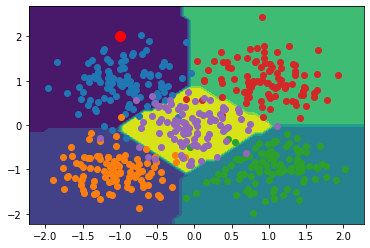

In [23]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

point = np.array([[-1,2]])
pred = model.predict_classes(point)
print('Prediction  : ',pred)
plt.plot(point[0][0],point[0][1],marker = 'o',markersize = 10,color = 'red')